        PI     PT     LL     SS      PR     GS  ST
0    63.03  22.55  39.61  40.48   98.67  -0.25  AB
1    39.06  10.06  25.02     29  114.41   4.56  AB
2    68.83  22.22  50.09  46.61  105.99  -3.53  AB
3     69.3  24.65  44.31  44.64  101.87  11.21  AB
4    49.71   9.65  28.32  40.06  108.17   7.92  AB
..     ...    ...    ...    ...     ...    ...  ..
305   47.9  13.62     36  34.29  117.45  -4.25  NO
306  53.94  20.72  29.22  33.22  114.37  -0.42  NO
307  61.45  22.69  46.17  38.75  125.67  -2.71  NO
308  45.25   8.69  41.58  36.56  118.55   0.21  NO
309  33.84   5.07  36.64  28.77  123.95   -0.2  NO

[310 rows x 7 columns]


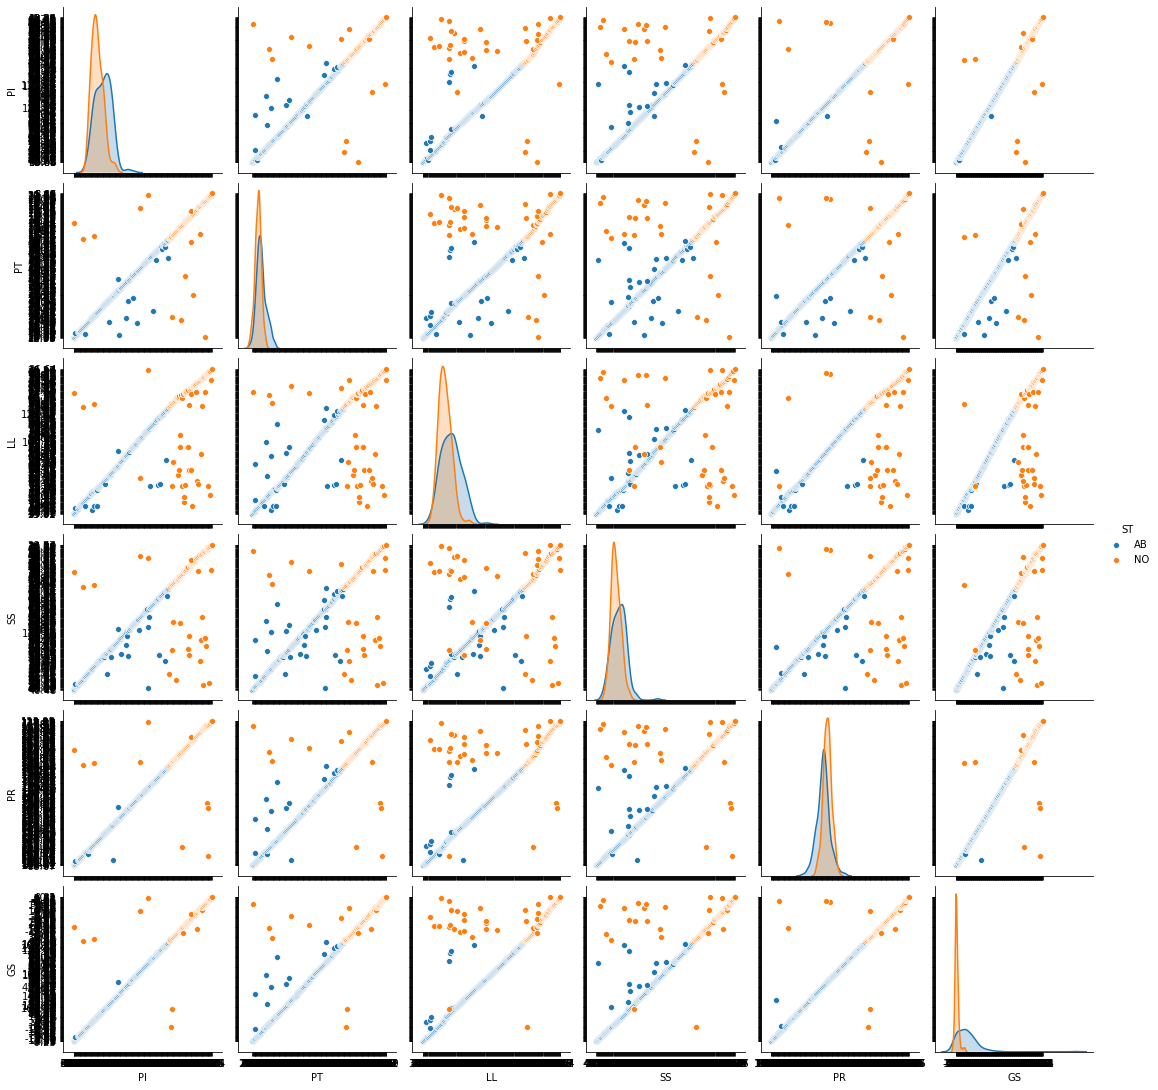

In [111]:
#(b)i
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
obj=pd.read_csv(r'/Users/guojiawei/Downloads/vertebral_column_data/column_2C.dat',header=None);
obj.columns =["A"];
obj.head;
df=obj
df=df['A'].str.split(' ',expand=True);
df.columns =["PI","PT","LL","SS","PR","GS","ST"];
df.head;
print(df)
ax=sns.pairplot(df,hue="ST");

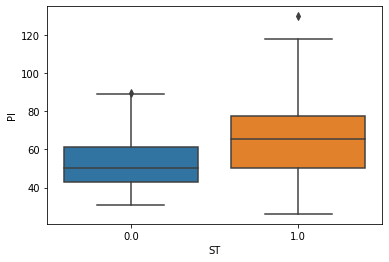

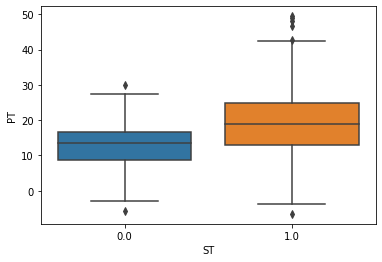

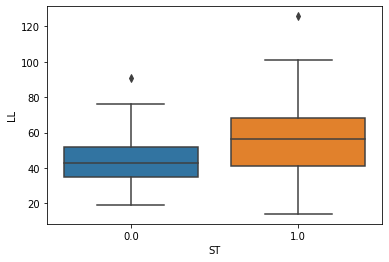

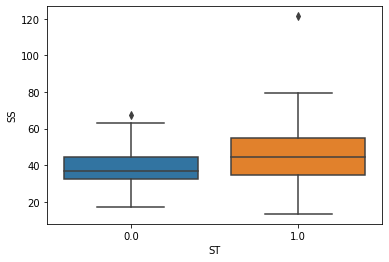

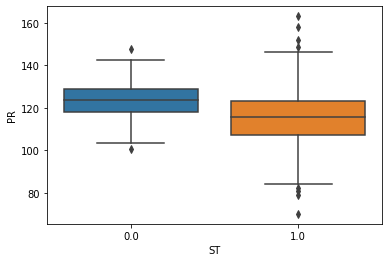

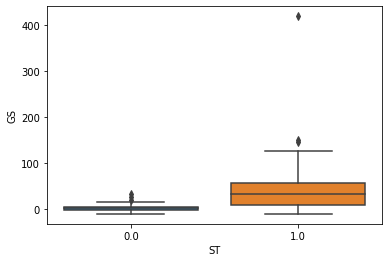

In [114]:
#(b)ii
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
obj=pd.read_table(r'/Users/guojiawei/Downloads/vertebral_column_data/column_2C.dat',header=None);
obj.columns =["A"];
obj.head;
df=pd.DataFrame(data=obj);
df=df['A'].str.split(' ',expand=True);
df.columns =["PI","PT","LL","SS","PR","GS","ST"];
df.head;
df.loc[df['ST'] == 'AB', 'ST'] = 1;
df.loc[df['ST'] == 'NO', 'ST'] = 0;
df1=pd.DataFrame(data=df,dtype=np.float);

sns.boxplot( x="ST", y="PI",data=df1);
plt.show()
sns.boxplot( x="ST", y="PT",data=df1);
plt.show()
sns.boxplot( x="ST", y="LL",data=df1);
plt.show()
sns.boxplot( x="ST", y="SS",data=df1);
plt.show()
sns.boxplot( x="ST", y="PR",data=df1);
plt.show()
sns.boxplot( x="ST", y="GS",data=df1);

In [58]:
#(b)iii
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
obj=pd.read_table(r'/Users/guojiawei/Downloads/vertebral_column_data/column_2C.dat',header=None);
obj.columns =["A"];
obj.head;
df=pd.DataFrame(data=obj);
df=df['A'].str.split(' ',expand=True);
df.columns =["PI","PT","LL","SS","PR","GS","ST"];
df.head;
control = " ST == 'AB' ";
control2 = " ST== 'NO' ";
df2=df.query(control2);
df1=df.query(control);
data0_train=df2[0:70];
data0_test=df2[70:100];
data1_train=df1[0:140];
data1_test=df1[140:210];
data_train=data0_train.append(data1_train);
data_test=data0_test.append(data1_test);
data_train.reset_index(drop=True,inplace=True)
data_test.reset_index(drop=True,inplace=True)
print(data_train);
print(data_test);

        PI     PT     LL     SS      PR     GS  ST
0    38.51  16.96  35.11  21.54  127.63   7.99  NO
1    54.92  18.97   51.6  35.95  125.85      2  NO
2    44.36   8.95   46.9  35.42  129.22   4.99  NO
3    48.32  17.45     48  30.87  128.98  -0.91  NO
4     45.7  10.66  42.58  35.04  130.18  -3.39  NO
..     ...    ...    ...    ...     ...    ...  ..
205  77.12  30.35  77.48  46.77  110.61  82.09  AB
206  88.02  39.84  81.77  48.18   116.6  56.77  AB
207   83.4  34.31  78.42  49.09  110.47  49.67  AB
208  72.05   24.7  79.87  47.35  107.17  56.43  AB
209   85.1  21.07  91.73  64.03  109.06  38.03  AB

[210 rows x 7 columns]
       PI     PT     LL     SS      PR      GS  ST
0   50.09  13.43  34.46  36.66  119.13    3.09  NO
1   64.26   14.5   43.9  49.76  115.39    5.95  NO
2   53.68  13.45  41.58  40.24  113.91    2.74  NO
3      49  13.11  51.87  35.88   126.4    0.54  NO
4   59.17  14.56   43.2   44.6  121.04    2.83  NO
..    ...    ...    ...    ...     ...     ...  ..
95  80.

the optimal k is
4


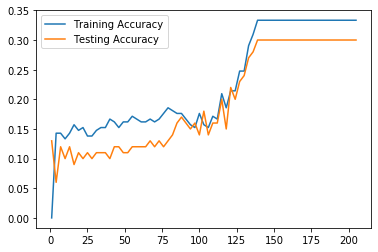

In [18]:
#(c)i and ii find k
from sklearn import neighbors
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
kemax=0;
k_opt=0;
temp=0;
k_error = [];
k_error1 = [];
k_max=[];
kemaxar=[];
k_range = range(1, 208,3)
obj=pd.read_table(r'/Users/guojiawei/Downloads/vertebral_column_data/column_2C.dat',header=None);
obj.columns =["A"];
obj.head;
df=pd.DataFrame(data=obj);
df=df['A'].str.split(' ',expand=True);
df.columns =["PI","PT","LL","SS","PR","GS","ST"];
df.head;
control = " ST == 'AB' ";
control2 = " ST== 'NO' ";
df2=df.query(control2);
df1=df.query(control);
data0_train=df2[0:70];
data0_test=df2[70:100];
data1_train=df1[0:140];
data1_test=df1[140:210];
data_train=data1_train.append(data0_train);
data_test=data1_test.append(data0_test);
X_training=np.array(data_train[['PI', 'PT','LL','SS','PR','GS']]);
y_training=np.array(data_train[['ST']]);
y_training= np.array([0 if u == 'NO' else 1 for u in y_training])
X_test=np.array(data_test[['PI', 'PT','LL','SS','PR','GS']]);
y_test=np.array(data_test[['ST']]);
y_test= np.array([0 if u == 'NO' else 1 for u in y_test])
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(X_training,y_training);
    y_train_pred = knn.predict(X_training);
    ytestpredict=knn.predict(X_test);
    ke2=1-accuracy_score(y_training,y_train_pred)
    ke3=1-accuracy_score(y_test,ytestpredict);
    if (kemax<accuracy_score(y_test,ytestpredict)):
        k_opt=k
        kemax=accuracy_score(y_test,ytestpredict);
    k_error1.append(ke3);
    k_error.append(ke2)
plt.plot(k_range, k_error,label='Training Accuracy');
plt.plot(k_range, k_error1,label='Testing Accuracy');
plt.legend()
print('the optimal k is')
print(k_opt);

In [1]:
#(c)ii confusion matrix, true positive rate, true negative rate, precision, F1-score 
from sklearn import neighbors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore")
kemax=0;
k_opt=0;
temp=0;
k_error = [];
k_error1 = [];
k_max=[];
kemaxar=[];
k_range = range(1, 211,3)
obj=pd.read_csv(r'/Users/guojiawei/Downloads/vertebral_column_data/column_2C.dat',header=None);
obj.columns =["A"];
obj.head;
df=obj;
df=df['A'].str.split(' ',expand=True);
df.columns =["PI","PT","LL","SS","PR","GS","ST"];
df.head;
control = " ST == 'AB' ";
control2 = " ST== 'NO' ";
df2=df.query(control2);
df1=df.query(control);
data0_train=df2[0:70];
data0_test=df2[70:];
data1_train=df1[0:140];
data1_test=df1[140:];
data_train=data0_train.append(data1_train);
data_test=data0_test.append(data1_test);
data_train.reset_index(drop=True,inplace=True)
data_test.reset_index(drop=True,inplace=True)

X_training=np.array(data_train[['PI', 'PT','LL','SS','PR','GS']]);
y_training=np.array(data_train[['ST']]);
y_training= np.array([0 if u == 'NO' else 1 for u in y_training])
X_test=np.array(data_test[['PI', 'PT','LL','SS','PR','GS']]);
y_test=np.array(data_test[['ST']]);
y_test= np.array([0 if u == 'NO' else 1 for u in y_test])
knn = neighbors.KNeighborsClassifier(n_neighbors=4)
knn.fit(X_training,y_training);
y_train_pred = knn.predict(X_training);
ytestpredict=knn.predict(X_test);
cm = confusion_matrix(y_test,ytestpredict);
print('confusion matrix=')
print(cm);
TPR=cm[1][1]/(cm[1][0]+cm[1][1]);
print('TPR=')
print(TPR);
TNP=cm[0][0]/(cm[0][1]+cm[0][0]);
print('TNP=');
print(TNP);
pr=cm[1][1]/(cm[0][1]+cm[1][1]);
f1=2*cm[1][1]/(2*cm[1][1]+cm[0][1]+cm[1][0]);
print('precision');
print(pr);
print('f1-score');
print(f1);

confusion matrix=
[[25  5]
 [ 1 69]]
TPR=
0.9857142857142858
TNP=
0.8333333333333334
precision
0.9324324324324325
f1-score
0.9583333333333334


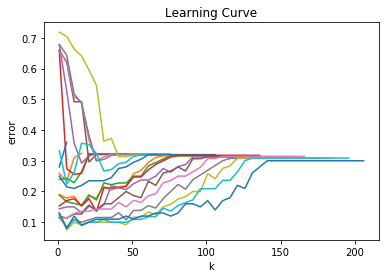

In [17]:
#(b)iii learning curve
from sklearn import neighbors
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
n_range= range(10,211,10);
obj=pd.read_table(r'/Users/guojiawei/Downloads/vertebral_column_data/column_2C.dat',header=None);
obj.columns =["A"];
obj.head;
df=pd.DataFrame(data=obj);
df=df['A'].str.split(' ',expand=True);
df.columns =["PI","PT","LL","SS","PR","GS","ST"];
df.head;
control = " ST == 'AB' ";
control2 = " ST== 'NO' ";
df2=df.query(control2);
df1=df.query(control);
i=0;
for n in n_range:
   n3=int(n/3);
   n4=n-n3;
   data0_train=df2[0:n3];
   data0_test=df2[n3:100];
   data1_train=df1[0:n4];
   data1_test=df1[n4:210];
   data_train=data0_train.append(data1_train);
   data_test=data0_test.append(data1_test);
   data_train.reset_index(drop=True,inplace=True)
   data_test.reset_index(drop=True,inplace=True)
   
   X_training=np.array(data_train[['PI', 'PT','LL','SS','PR','GS']]);
   y_training=np.array(data_train[['ST']]);
   y_training= np.array([0 if u == 'NO' else 1 for u in y_training])
   X_test=np.array(data_test[['PI', 'PT','LL','SS','PR','GS']]);
   y_test=np.array(data_test[['ST']]);
   y_test= np.array([0 if u == 'NO' else 1 for u in y_test])
   ke1=0;
   k_error1=[];
   for k in range(1,n,5):
      knn = neighbors.KNeighborsClassifier(n_neighbors=k)
      knn.fit(X_training,y_training);
      y_train_pred = knn.predict(X_training);
      ytestpredict=knn.predict(X_test);
      ke2=1-accuracy_score(y_test,ytestpredict);
      k_error1.append(ke2);
   plt.xlabel('k')
   plt.ylabel('error')
   plt.plot(range(1,n,5), k_error1);  
   plt.title('Learning Curve') 

the optimal k is
26


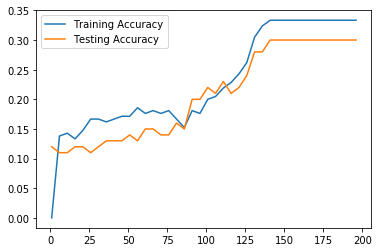

In [16]:
#(d) i A
from sklearn import neighbors
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
kemax=0;
k_opt=0;
temp=0;
k_error = [];
k_error1 = [];
k_max=[];
kemaxar=[];
k_range = range(1, 201,5)
obj=pd.read_table(r'/Users/guojiawei/Downloads/vertebral_column_data/column_2C.dat',header=None);
obj.columns =["A"];
obj.head;
df=pd.DataFrame(data=obj);
df=df['A'].str.split(' ',expand=True);
df.columns =["PI","PT","LL","SS","PR","GS","ST"];
df.head;
control = " ST == 'AB' ";
control2 = " ST== 'NO' ";
df2=df.query(control2);
df1=df.query(control);
data0_train=df2[0:70];
data0_test=df2[70:100];
data1_train=df1[0:140];
data1_test=df1[140:210];
data_train=data1_train.append(data0_train);
data_test=data1_test.append(data0_test);
X_training=np.array(data_train[['PI', 'PT','LL','SS','PR','GS']]);
y_training=np.array(data_train[['ST']]);
y_training= np.array([0 if u == 'NO' else 1 for u in y_training])
X_test=np.array(data_test[['PI', 'PT','LL','SS','PR','GS']]);
y_test=np.array(data_test[['ST']]);
y_test= np.array([0 if u == 'NO' else 1 for u in y_test])
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k,metric='manhattan',p=1)
    knn.fit(X_training,y_training);
    y_train_pred = knn.predict(X_training);
    ytestpredict=knn.predict(X_test);
    ke2=1-accuracy_score(y_training,y_train_pred)
    ke3=1-accuracy_score(y_test,ytestpredict);
    if (kemax<=accuracy_score(y_test,ytestpredict)):
        k_opt=k
        kemax=accuracy_score(y_test,ytestpredict);
    k_error1.append(ke3);
    k_error.append(ke2)
plt.plot(k_range, k_error,label='Training Accuracy');
plt.plot(k_range, k_error1,label='Testing Accuracy');
plt.legend()
print('the optimal k is')
print(k_opt);

In [14]:
#(d) i B
from sklearn import neighbors
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import warnings
warnings.filterwarnings("ignore")
a = np.arange(0.1,1.1,0.1)
par=pow(10,a)
kemax=0;
k_opt=0;
temp=0;
p_opt=0;
k_error = [];
k_error1 = [];
k_max=[];
kemaxar=[];
pp_opt=[];
k_range = range(1, 201,5)
obj=pd.read_table(r'/Users/guojiawei/Downloads/vertebral_column_data/column_2C.dat',header=None);
obj.columns =["A"];
obj.head;
df=pd.DataFrame(data=obj);
df=df['A'].str.split(' ',expand=True);
df.columns =["PI","PT","LL","SS","PR","GS","ST"];
df.head;
control = " ST == 'AB' ";
control2 = " ST== 'NO' ";
df2=df.query(control2);
df1=df.query(control);
data0_train=df2[0:70];
data0_test=df2[70:100];
data1_train=df1[0:140];
data1_test=df1[140:210];
data_train=data0_train.append(data1_train);
data_test=data0_test.append(data1_test);
data_train.reset_index(drop=True,inplace=True)
data_test.reset_index(drop=True,inplace=True)

X_training=np.array(data_train[['PI', 'PT','LL','SS','PR','GS']]);
y_training=np.array(data_train[['ST']]);
y_training= np.array([0 if u == 'NO' else 1 for u in y_training])
X_test=np.array(data_test[['PI', 'PT','LL','SS','PR','GS']]);
y_test=np.array(data_test[['ST']]);
y_test= np.array([0 if u == 'NO' else 1 for u in y_test])
for ppp in par:
    knn = neighbors.KNeighborsClassifier(n_neighbors=26,metric='minkowski',p=ppp);
    knn.fit(X_training,y_training);
    y_train_pred = knn.predict(X_training);
    ytestpredict=knn.predict(X_test);
    #ke=sum(ytrue['ST'] == ypredict['ST'])/ len(ytrue);
    ke1=1-accuracy_score(y_test,ytestpredict);
    ke2=1-accuracy_score(y_training,y_train_pred);
    
    if (kemax<=accuracy_score(y_test,ytestpredict)):
        p_opt=ppp
        pp_opt.append(ppp);
        kemax=accuracy_score(y_test,ytestpredict);
       

    k_error1.append(ke1);
print('the optimal p is')
print(pp_opt);

the optimal p is
[1.2589254117941673, 1.5848931924611136, 2.51188643150958, 3.9810717055349722]


the optimal k is
16


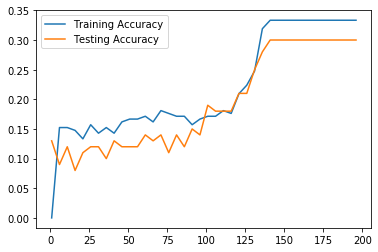

In [15]:
#(d) i C
from sklearn import neighbors
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
kemax=0;
k_opt=0;
temp=0;
k_error = [];
k_error1 = [];
k_max=[];
kemaxar=[];
k_range = range(1, 201,5)
obj=pd.read_table(r'/Users/guojiawei/Downloads/vertebral_column_data/column_2C.dat',header=None);
obj.columns =["A"];
obj.head;
df=pd.DataFrame(data=obj);
df=df['A'].str.split(' ',expand=True);
df.columns =["PI","PT","LL","SS","PR","GS","ST"];
df.head;
control = " ST == 'AB' ";
control2 = " ST== 'NO' ";
df2=df.query(control2);
df1=df.query(control);
data0_train=df2[0:70];
data0_test=df2[70:100];
data1_train=df1[0:140];
data1_test=df1[140:210];
data_train=data1_train.append(data0_train);
data_test=data1_test.append(data0_test);
X_training=np.array(data_train[['PI', 'PT','LL','SS','PR','GS']]);
y_training=np.array(data_train[['ST']]);
y_training= np.array([0 if u == 'NO' else 1 for u in y_training])
X_test=np.array(data_test[['PI', 'PT','LL','SS','PR','GS']]);
y_test=np.array(data_test[['ST']]);
y_test= np.array([0 if u == 'NO' else 1 for u in y_test])
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k,metric='chebyshev')
    knn.fit(X_training,y_training);
    y_train_pred = knn.predict(X_training);
    ytestpredict=knn.predict(X_test);
    ke2=1-accuracy_score(y_training,y_train_pred)
    ke3=1-accuracy_score(y_test,ytestpredict);
    if (kemax<=accuracy_score(y_test,ytestpredict)):
        k_opt=k
        kemax=accuracy_score(y_test,ytestpredict);
    k_error1.append(ke3);
    k_error.append(ke2)
plt.plot(k_range, k_error,label='Training Accuracy');
plt.plot(k_range, k_error1,label='Testing Accuracy');
plt.legend()
print('the optimal k is')
print(k_opt);

the optimal k is
6


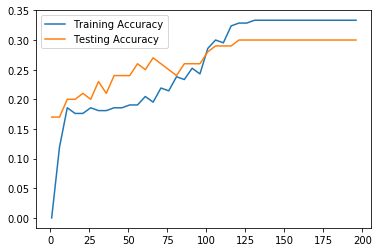

In [12]:
#(d)ii
from sklearn import neighbors
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
kemax=0;
k_opt=0;
temp=0;
k_error = [];
k_error1 = [];
k_max=[];
kemaxar=[];
k_range = range(1, 201,5)
obj=pd.read_table(r'/Users/guojiawei/Downloads/vertebral_column_data/column_2C.dat',header=None);
obj.columns =["A"];
obj.head;
df=pd.DataFrame(data=obj);
df=df['A'].str.split(' ',expand=True);
df.columns =["PI","PT","LL","SS","PR","GS","ST"];
df.head;
control = " ST == 'AB' ";
control2 = " ST== 'NO' ";
df2=df.query(control2);
df1=df.query(control);
data0_train=df2[0:70];
data0_test=df2[70:100];
data1_train=df1[0:140];
data1_test=df1[140:210];
data_train=data1_train.append(data0_train);
data_test=data1_test.append(data0_test);
X_training=np.array(data_train[['PI', 'PT','LL','SS','PR','GS']]);
y_training=np.array(data_train[['ST']]);
y_training= np.array([0 if u == 'NO' else 1 for u in y_training])
X_test=np.array(data_test[['PI', 'PT','LL','SS','PR','GS']]);
y_test=np.array(data_test[['ST']]);
y_test= np.array([0 if u == 'NO' else 1 for u in y_test])
trar=data_train.drop(columns=['ST']);
trar=trar.astype(float).values;
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k,metric='mahalanobis',metric_params={'V': np.cov(trar,rowvar=False)})
    knn.fit(X_training,y_training);
    y_train_pred = knn.predict(X_training);
    ytestpredict=knn.predict(X_test);
    ke2=1-accuracy_score(y_training,y_train_pred)
    ke3=1-accuracy_score(y_test,ytestpredict);
    if (kemax<=accuracy_score(y_test,ytestpredict)):
        k_opt=k
        kemax=accuracy_score(y_test,ytestpredict);
    k_error1.append(ke3);
    k_error.append(ke2)
plt.plot(k_range, k_error,label='Training Accuracy');
plt.plot(k_range, k_error1,label='Testing Accuracy');
plt.legend()
print('the optimal k is')
print(k_opt);

the best test error is for euclidean
0.09999999999999998


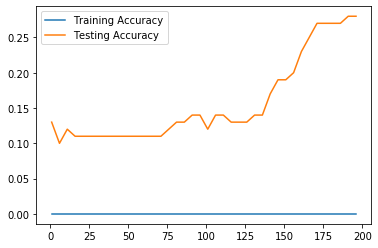

In [105]:
#(e) euclidean
from sklearn import neighbors
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
kemax=0;
k_opt=0;
temp=0;
k_error = [];
k_error1 = [];
k_max=[];
kemaxar=[];
k_range = range(1, 201,5)
obj=pd.read_table(r'/Users/guojiawei/Downloads/vertebral_column_data/column_2C.dat',header=None);
obj.columns =["A"];
obj.head;
df=pd.DataFrame(data=obj);
df=df['A'].str.split(' ',expand=True);
df.columns =["PI","PT","LL","SS","PR","GS","ST"];
df.head;
control = " ST == 'AB' ";
control2 = " ST== 'NO' ";
df2=df.query(control2);
df1=df.query(control);
data0_train=df2[0:70];
data0_test=df2[70:100];
data1_train=df1[0:140];
data1_test=df1[140:210];
data_train=data1_train.append(data0_train);
data_test=data1_test.append(data0_test);
X_training=np.array(data_train[['PI', 'PT','LL','SS','PR','GS']]);
y_training=np.array(data_train[['ST']]);
y_training= np.array([0 if u == 'NO' else 1 for u in y_training])
X_test=np.array(data_test[['PI', 'PT','LL','SS','PR','GS']]);
y_test=np.array(data_test[['ST']]);
y_test= np.array([0 if u == 'NO' else 1 for u in y_test])
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k,metric='euclidean',weights='distance')
    knn.fit(X_training,y_training);
    y_train_pred = knn.predict(X_training);
    ytestpredict=knn.predict(X_test);
    ke2=1-accuracy_score(y_training,y_train_pred)
    ke3=1-accuracy_score(y_test,ytestpredict);
    if (kemax<accuracy_score(y_test,ytestpredict)):
        k_opt=k
        kemax=accuracy_score(y_test,ytestpredict);
    k_error1.append(ke3);
    k_error.append(ke2)
mn=min(k_error1);
print('the best test error is for euclidean')
print(mn);

In [107]:
#(e) manhattan
from sklearn import neighbors
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
kemax=0;
k_opt=0;
temp=0;
k_error = [];
k_error1 = [];
k_max=[];
kemaxar=[];
k_range = range(1, 201,5)
obj=pd.read_table(r'/Users/guojiawei/Downloads/vertebral_column_data/column_2C.dat',header=None);
obj.columns =["A"];
obj.head;
df=pd.DataFrame(data=obj);
df=df['A'].str.split(' ',expand=True);
df.columns =["PI","PT","LL","SS","PR","GS","ST"];
df.head;
control = " ST == 'AB' ";
control2 = " ST== 'NO' ";
df2=df.query(control2);
df1=df.query(control);
data0_train=df2[0:70];
data0_test=df2[70:100];
data1_train=df1[0:140];
data1_test=df1[140:210];
data_train=data1_train.append(data0_train);
data_test=data1_test.append(data0_test);
X_training=np.array(data_train[['PI', 'PT','LL','SS','PR','GS']]);
y_training=np.array(data_train[['ST']]);
y_training= np.array([0 if u == 'NO' else 1 for u in y_training])
X_test=np.array(data_test[['PI', 'PT','LL','SS','PR','GS']]);
y_test=np.array(data_test[['ST']]);
y_test= np.array([0 if u == 'NO' else 1 for u in y_test])
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k,metric='manhattan',weights='distance')
    knn.fit(X_training,y_training);
    y_train_pred = knn.predict(X_training);
    ytestpredict=knn.predict(X_test);
    ke2=1-accuracy_score(y_training,y_train_pred)
    ke3=1-accuracy_score(y_test,ytestpredict);
    if (kemax<=accuracy_score(y_test,ytestpredict)):
        k_opt=k
        kemax=accuracy_score(y_test,ytestpredict);
    k_error1.append(ke3);
    k_error.append(ke2)
mn=min(k_error1);
print('the best test error is for manhattan')
print(mn);

the best test error is for manhattan
0.09999999999999998


In [106]:
#(e) chebyshev
from sklearn import neighbors
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
kemax=0;
k_opt=0;
temp=0;
k_error = [];
k_error1 = [];
k_max=[];
kemaxar=[];
k_range = range(1, 201,5)
obj=pd.read_table(r'/Users/guojiawei/Downloads/vertebral_column_data/column_2C.dat',header=None);
obj.columns =["A"];
obj.head;
df=pd.DataFrame(data=obj);
df=df['A'].str.split(' ',expand=True);
df.columns =["PI","PT","LL","SS","PR","GS","ST"];
df.head;
control = " ST == 'AB' ";
control2 = " ST== 'NO' ";
df2=df.query(control2);
df1=df.query(control);
data0_train=df2[0:70];
data0_test=df2[70:100];
data1_train=df1[0:140];
data1_test=df1[140:210];
data_train=data1_train.append(data0_train);
data_test=data1_test.append(data0_test);
X_training=np.array(data_train[['PI', 'PT','LL','SS','PR','GS']]);
y_training=np.array(data_train[['ST']]);
y_training= np.array([0 if u == 'NO' else 1 for u in y_training])
X_test=np.array(data_test[['PI', 'PT','LL','SS','PR','GS']]);
y_test=np.array(data_test[['ST']]);
y_test= np.array([0 if u == 'NO' else 1 for u in y_test])
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k,metric='chebyshev',weights='distance')
    knn.fit(X_training,y_training);
    y_train_pred = knn.predict(X_training);
    ytestpredict=knn.predict(X_test);
    ke2=1-accuracy_score(y_training,y_train_pred)
    ke3=1-accuracy_score(y_test,ytestpredict);
    if (kemax<=accuracy_score(y_test,ytestpredict)):
        k_opt=k
        kemax=accuracy_score(y_test,ytestpredict);
    k_error1.append(ke3);
    k_error.append(ke2)
mn=min(k_error1);
print('the best test error is for chebyshev')
print(mn);

the best test error is for chebyshev
0.10999999999999999


In [ ]:
##### in [(d) i C] the traning error can be 0.0 so the lowest traing error is 0.0 